In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Weather Dataframe Exploratory Analysis

In [2]:
## I am importing the weather dataframe and taking a look at a few key characteristics

weather_df = pd.read_csv('/Users/TerryONeill/west_nile/west_nile/assets/weather.csv')
    
print 'size of dataframe:\n', weather_df.shape
print
print 'datatypes:\n', weather_df.dtypes
print
print 'null values:\n', weather_df.isnull().sum()

size of dataframe:
(2944, 22)

datatypes:
Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object

null values:
Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64


In [11]:
## now the head of the weather dataframe
weather_df.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [6]:
## checking on value counts for station column
weather_df.Station.value_counts()

## as we can see below, there are only 2 weather stations

1    1472
2    1472
Name: Station, dtype: int64

In [8]:
weather_df.Date.nunique()

1472

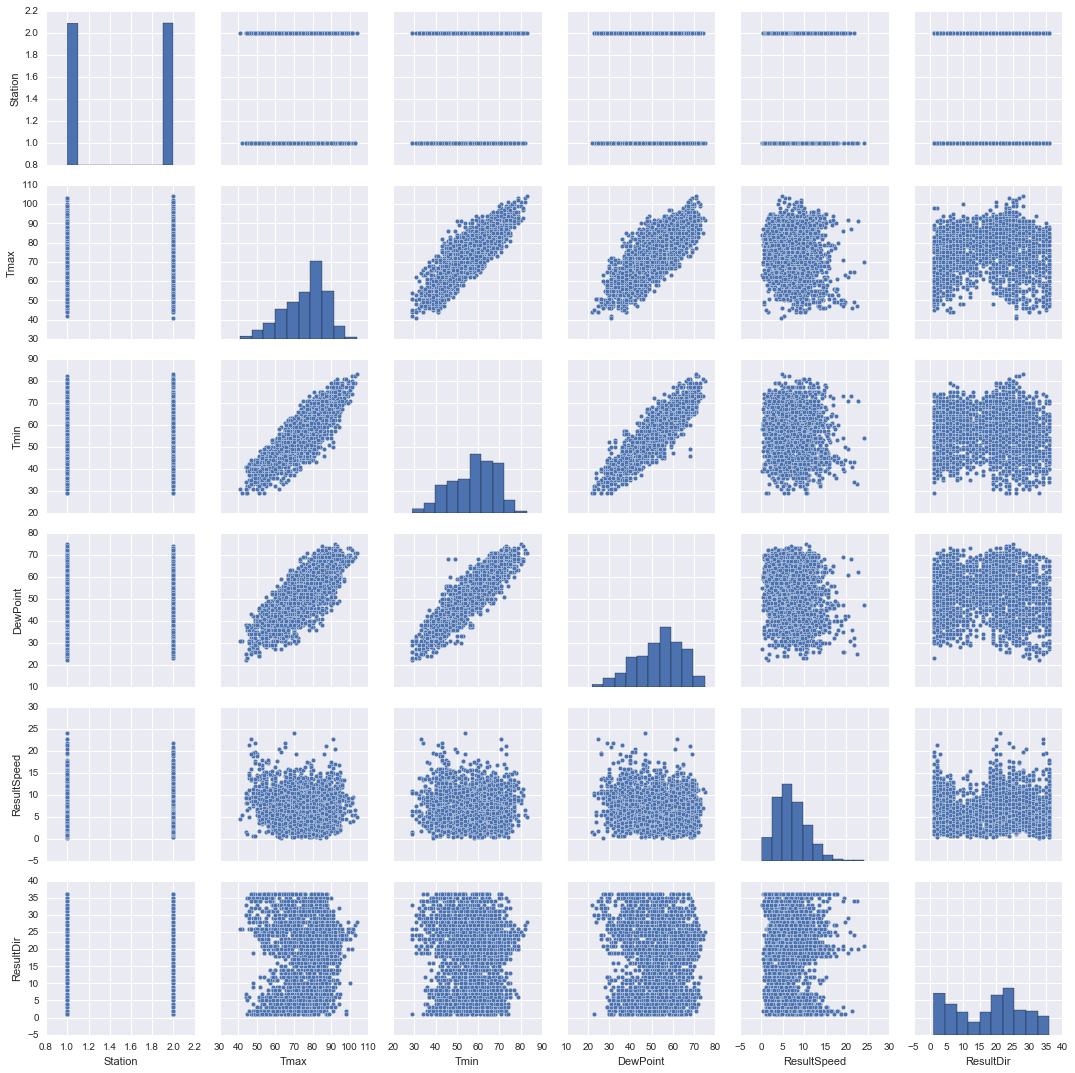

In [5]:
sns.pairplot(weather_df)

## the station graphs really arent giving us much to work with here

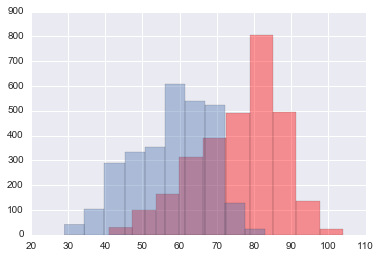

In [60]:
## this shows the distribution of the max and min temperatures

plt.hist(weather_df.Tmax, alpha = .4, color = 'red')


plt.hist(weather_df.Tmin, alpha = .4)
plt.show()

In [3]:
print weather_df.columns
print

## Here I am changing the date column to date time and making it the index
weather_df.Date = pd.to_datetime(weather_df.Date)
weather_df.set_index('Date', inplace = True)

Index([u'Station', u'Date', u'Tmax', u'Tmin', u'Tavg', u'Depart', u'DewPoint',
       u'WetBulb', u'Heat', u'Cool', u'Sunrise', u'Sunset', u'CodeSum',
       u'Depth', u'Water1', u'SnowFall', u'PrecipTotal', u'StnPressure',
       u'SeaLevel', u'ResultSpeed', u'ResultDir', u'AvgSpeed'],
      dtype='object')



In [4]:
## Missing values for this dataframe are marked as an 'M', so this loops through all
## the columns and tells us how many missing values each column has

for i in weather_df:
    col_list = []
    for row in weather_df[i]:
        if row == 'M':
            col_list.append(row)
    print i+':'
    print len(col_list)
#weather_df[weather_df.]

Station:
0
Tmax:
0
Tmin:
0
Tavg:
11
Depart:
1472
DewPoint:
0
WetBulb:
4
Heat:
11
Cool:
11
Sunrise:
0
Sunset:
0
CodeSum:
0
Depth:
1472
Water1:
2944
SnowFall:
1472
PrecipTotal:
2
StnPressure:
4
SeaLevel:
9
ResultSpeed:
0
ResultDir:
0
AvgSpeed:
3


In [34]:
## this is mainly just to look for values that might mean missing or unavailable but 
## dont show up as a null value

for i in weather_df.columns:
    print i
    print
    print weather_df[i].value_counts()
    print '======================================================'
    print '======================================================'
    print '======================================================'
    print

Station

1    1472
2    1472
Name: Station, dtype: int64

Tmax

84     128
79     121
82     118
81     117
83     109
80     107
85     107
86     101
77     100
87      97
88      91
74      85
78      84
89      83
75      79
76      79
72      72
70      71
73      65
71      64
90      62
67      62
91      61
69      60
68      60
66      50
60      50
65      46
63      43
62      43
      ... 
93      34
59      31
55      29
56      28
94      28
57      27
58      26
53      25
54      23
50      19
51      18
95      16
52      13
49      12
96      11
48      11
46       9
47       9
97       6
44       5
98       5
45       5
99       5
101      4
100      3
102      2
103      2
104      1
41       1
42       1
Name: Tmax, dtype: int64

Tmin

63    121
65    111
60    109
61    106
62    105
66    103
68    103
57    103
64    101
59    100
56     98
69     95
71     95
58     94
70     90
67     89
54     81
49     78
52     74
50     72
55     71
53     71
47     69
44 

In [7]:
weather_df['2012']

,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,,,,,,,,,
2012-05-01,1,65,49,57,4,52,55,8,0,0448,...,RA BR HZ,0,M,0.0,0.09,29.18,29.92,6.2,12,7.7
2012-05-01,2,64,52,58,M,53,56,7,0,-,...,RA BR HZ,M,M,M,0.32,29.24,29.92,5.5,12,6.3
2012-05-02,1,80,58,69,15,60,64,0,4,0447,...,FG+ BR,0,M,0.0,0.00,29.12,29.84,8.1,21,10.1
2012-05-02,2,78,60,69,M,60,64,0,4,-,...,BR,M,M,M,T,29.19,29.83,7.5,20,9.6
2012-05-03,1,86,66,76,22,65,69,0,11,0446,...,TS TSRA,0,M,T,1.34,29.16,29.86,10.8,21,12.0
2012-05-03,2,86,69,78,M,64,69,0,13,-,...,TSRA RA BR VCTS,M,M,M,0.07,29.23,29.86,12.8,21,13.3
2012-05-04,1,73,55,64,10,55,58,1,0,0444,...,TSRA BR HZ,0,M,0.0,0.28,29.23,29.94,5.2,5,9.2
2012-05-04,2,72,51,62,M,55,58,3,0,-,...,TSRA BR HZ,M,M,M,0.28,29.28,29.93,6.8,2,10.0
2012-05-05,1,60,52,56,1,52,54,9,0,0443,...,RA BR HZ,0,M,0.0,T,29.29,30.01,8.0,4,8.3


In [5]:
weather_df.head()

,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,,,,,,,,,
2007-05-01,1,83,50,67,14,51,56,0,2,0448,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
2007-05-01,2,84,52,68,M,51,57,0,3,-,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2007-05-02,1,59,42,51,-3,42,47,14,0,0447,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
2007-05-02,2,60,43,52,M,42,47,13,0,-,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
2007-05-03,1,66,46,56,2,40,48,9,0,0446,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [11]:
## creating a month and a day in the year column
weather_df['month'] = weather_df.index.month
weather_df['day'] = weather_df['month']*30 + weather_df.index.day
weather_df.head()

,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,...,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,month,day
Date,,,,,,,,,,,,,,,,,,,,,
2007-05-01,1,83,50,67,14,51,56,0,2,0448,...,M,0.0,0.00,29.10,29.82,1.7,27,9.2,5,151
2007-05-01,2,84,52,68,M,51,57,0,3,-,...,M,M,0.00,29.18,29.82,2.7,25,9.6,5,151
2007-05-02,1,59,42,51,-3,42,47,14,0,0447,...,M,0.0,0.00,29.38,30.09,13.0,4,13.4,5,152
2007-05-02,2,60,43,52,M,42,47,13,0,-,...,M,M,0.00,29.44,30.08,13.3,2,13.4,5,152
2007-05-03,1,66,46,56,2,40,48,9,0,0446,...,M,0.0,0.00,29.39,30.12,11.7,7,11.9,5,153


In [12]:
## now i am going to export the dataframe as a csv file

weather_df.to_csv('/Users/TerryONeill/west_nile/west_nile/assets/weather.csv', encoding='utf-8')

In [7]:
## I am creating the engine that connects psql with my newly created database (west_nile)
## so that i can export the dataframes as tables

from sqlalchemy import create_engine
import psycopg2

engine = create_engine('postgresql://TerryONeill@localhost:5432/west_nile')

In [8]:
## this is adding the dataframe to my newly created database in psql as
## a table named 'whatever the first parameter is'
weather_df.to_sql('weather', engine)

## an error might get kicked up here since a table has already been created, that 
## is fine for us, just ignore the error. If you alter the dataframe then you need
## to delete the table in psql and then recreate it